In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import cv2

#  Load MNIST (Digits) dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 🔧 Normalize images
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

# 📸 Add inverted images to training and test sets
train_images_inverted = 1.0 - train_images
test_images_inverted = 1.0 - test_images

train_images = np.concatenate([train_images, train_images_inverted], axis=0)
train_labels = np.concatenate([train_labels, train_labels], axis=0)

test_images = np.concatenate([test_images, test_images_inverted], axis=0)
test_labels = np.concatenate([test_labels, test_labels], axis=0)

# Reshape for CNN
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

#  Enhanced Data Augmentation
data_augmentation = keras.Sequential([
    layers.RandomRotation(0.35),  # Rotate ±63°
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomZoom(0.3),
    layers.RandomTranslation(0.15, 0.15),
    layers.RandomContrast(0.3),
])

#  CNN Model
model = keras.Sequential([
    layers.Input(shape=(28, 28, 1)),
    data_augmentation,
    
    #LAYER 1
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    #LAYER 2
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax'),
])

# 🛠 Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 📈 Train the model
history = model.fit(train_images, train_labels,
                    epochs=15,
                    batch_size=64,
                    validation_split=0.1)

# 🧪 Evaluate
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc:.4f}")

# 🔍 Predict function with inversion detection
def predict_digit(model, image):
    image = cv2.resize(image, (28, 28))
    image = image.astype("float32") / 255.0
    image = 1.0 - image if np.mean(image) < 0.5 else image  # Detect if inverted
    image = image.reshape(1, 28, 28, 1)
    prediction = model.predict(image)
    return np.argmax(prediction)

# 🖼️ Example usage
# Assuming `img` is a grayscale image (28x28 or other) loaded via OpenCV or other method
# digit = predict_digit(model, img)
# print("Predicted digit:", digit)



Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 133s 75ms/step - accuracy: 0.4310 - loss: 1.7781 - val_accuracy: 0.8711 - val_loss: 0.4058
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 124s 74ms/step - accuracy: 0.7979 - loss: 0.6064 - val_accuracy: 0.9007 - val_loss: 0.3184
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 122s 72ms/step - accuracy: 0.8526 - loss: 0.4487 - val_accuracy: 0.9231 - val_loss: 0.2369
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 120s 71ms/step - accuracy: 0.8772 - loss: 0.3798 - val_accuracy: 0.9278 - val_loss: 0.2160
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 130s 77ms/step - accuracy: 0.8881 - loss: 0.3488 - val_accuracy: 0.9339 - val_loss: 0.2058
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 129s 77ms/step - accuracy: 0.8956 - loss: 0.3227 - val_accuracy: 0.9422 - val_loss: 0.1819
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 140s 83ms/step - accuracy: 0.9037 - loss: 0.3026 - val_accuracy: 0.9327 - val_loss: 0.2051
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 133s 78ms/step - accuracy: 

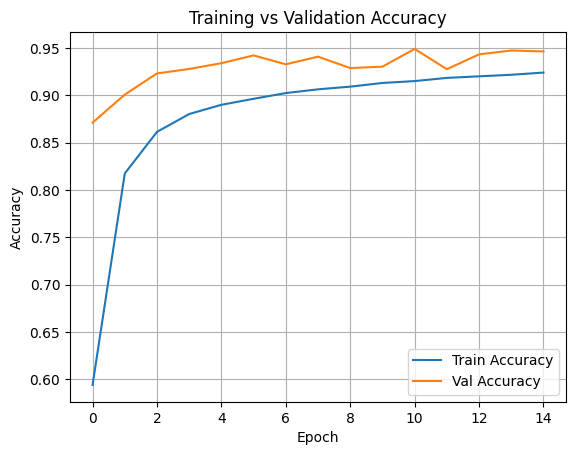

625/625 - 5s - 8ms/step - accuracy: 0.9512 - loss: 0.1487

✅ Final Test Accuracy: 0.951200008392334


In [ ]:
# 📈 Accuracy visualization
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# ✅ Evaluate on test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\n✅ Final Test Accuracy:", test_acc)

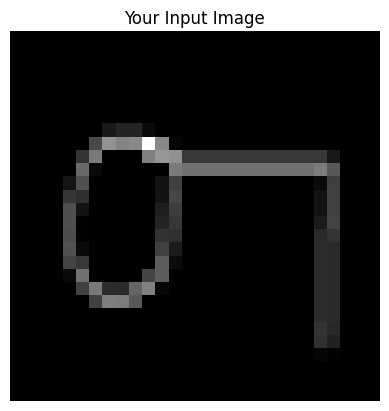

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step
Predicted digit from your image: 9


In [6]:
# ----------- Custom Image Prediction Section -----------

# Ask user for image path
from PIL import Image
import numpy as np
image_path = input("Enter the path to your handwritten digit image: ").strip().strip('"').strip("'")

# Preprocess the custom image
user_image = Image.open(image_path).convert('L')        # Convert to grayscale
user_image_resized = user_image.resize((28, 28))        # Resize
user_image_array = np.array(user_image_resized).astype("float32") / 255.0  # Normalize
user_image_array = 1.0 - user_image_array  # Optional: Invert if digit is black on white

# Visualize the processed input
plt.imshow(user_image_array, cmap="gray")
plt.title("Your Input Image")
plt.axis("off")
plt.show()

# Reshape and predict
user_image_reshaped = user_image_array.reshape(1, 28, 28, 1)
prediction = model.predict(user_image_reshaped)
predicted_digit = np.argmax(prediction)

print(f"Predicted digit from your image: {predicted_digit}")

625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step


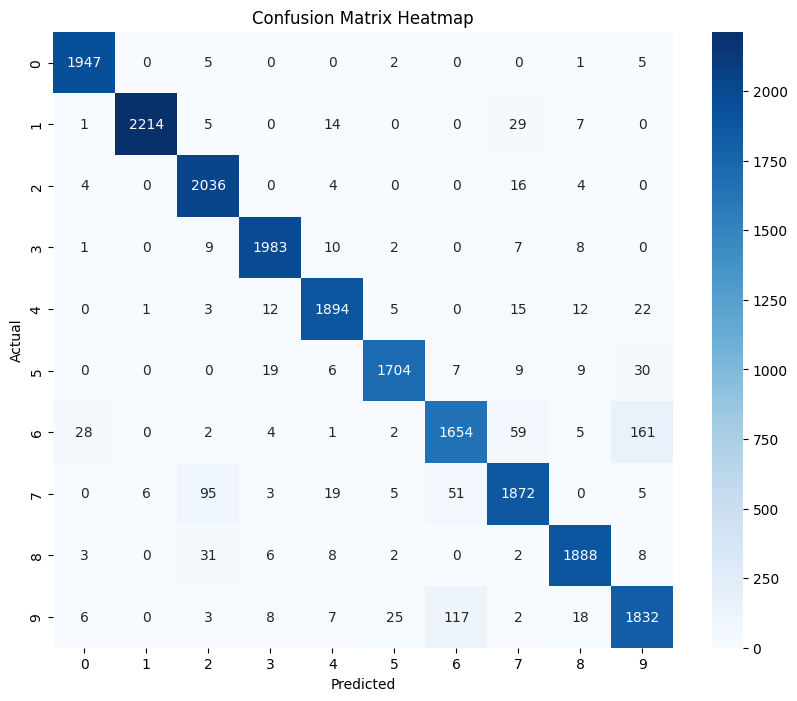

In [7]:

import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get model predictions
y_pred_probs = model.predict(test_images)  # shape: (num_samples, 10)
y_pred = np.argmax(y_pred_probs, axis=1)   # convert to class labels

# True labels
y_true = test_labels                       # assuming test_labels are in integer format (0-9)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()